In [1]:
import sys; sys.path.append('..')
from filehashcache.etc.performance import *
profiler = FileHashCacheProfiler()

In [2]:
profile_sizes=generate_profile_sizes(4, 10, 1000)
[f'{x:,}' for x in profile_sizes]

['1,000', '10,000', '100,000', '1,000,000']

In [23]:
profile_kwargs = dict(
    # size=generate_profile_sizes(6, 10, 10),
    size=profile_sizes,
    num_proc = (10,),
    iterations = 100000,
)
profile_kwargs

{'size': (1000, 10000, 100000, 1000000),
 'num_proc': (10,),
 'iterations': 100000}

In [24]:
def plot_sizes(self, x='write_num', y='write_total_time', shape=None, 
        color='Engine', facet=None, group_by=['Engine', 'write_num'], **profile_kwargs):
    p9.options.figure_size = 9, 6
    figdf = self.profile_df(
        group_by=group_by, 
        by_speed=True,
        **profile_kwargs
        # num_proc=2
    ).sort_index().reset_index()
    figdf=figdf.query(f'write_total_size>=1')
    figdf['Num Processes']=pd.Categorical(figdf['Num Processes'], categories=figdf['Num Processes'].unique())
    # figdf=figdf[figdf['MB/s']>0]

    fig = p9.ggplot(
        figdf, 
        p9.aes(
            x=x, 
            y=y,
            # shape=shape, 
            color=color,
            size='write_total_size'
        )
    )
    # fig += p9.geom_line(alpha=.5, size=1)
    fig += p9.geom_point(alpha=.5)
    # fig += p9.geom_smooth()
    engine_order = figdf.groupby('Engine')[y].mean().sort_values(ascending=False).index
    figdf['Engine'] = pd.Categorical(figdf['Engine'], categories=engine_order)
    # if facet: fig += p9.facet_wrap(facet,nrow=1)
    # fig += p9.facet_grid('Encoding~Size (B)', scales='free_y')
    fig += p9.scale_x_log10()
    # fig += p9.scale_y_log10()
    fig += p9.theme_classic()
    fig += p9.scale_size_continuous(range=(.5,2))
    return fig



In [25]:
# !rm -rf .cache_profile


('file',): 19834


Group ('file',), Num Processors: 100%|██████████| 1/1 [02:10<00:00, 130.83s/it]



('memory',): 20062


Group ('memory',), Num Processors: 100%|██████████| 1/1 [02:17<00:00, 137.07s/it]



('redis',): 19907


Group ('redis',), Num Processors: 100%|██████████| 1/1 [02:37<00:00, 157.17s/it]



('shelve',): 20091


Group ('shelve',), Num Processors: 100%|██████████| 1/1 [03:46<00:00, 226.29s/it]



('sqlite',): 20106


Group ('sqlite',), Num Processors: 100%|██████████| 1/1 [02:00<00:00, 120.23s/it]


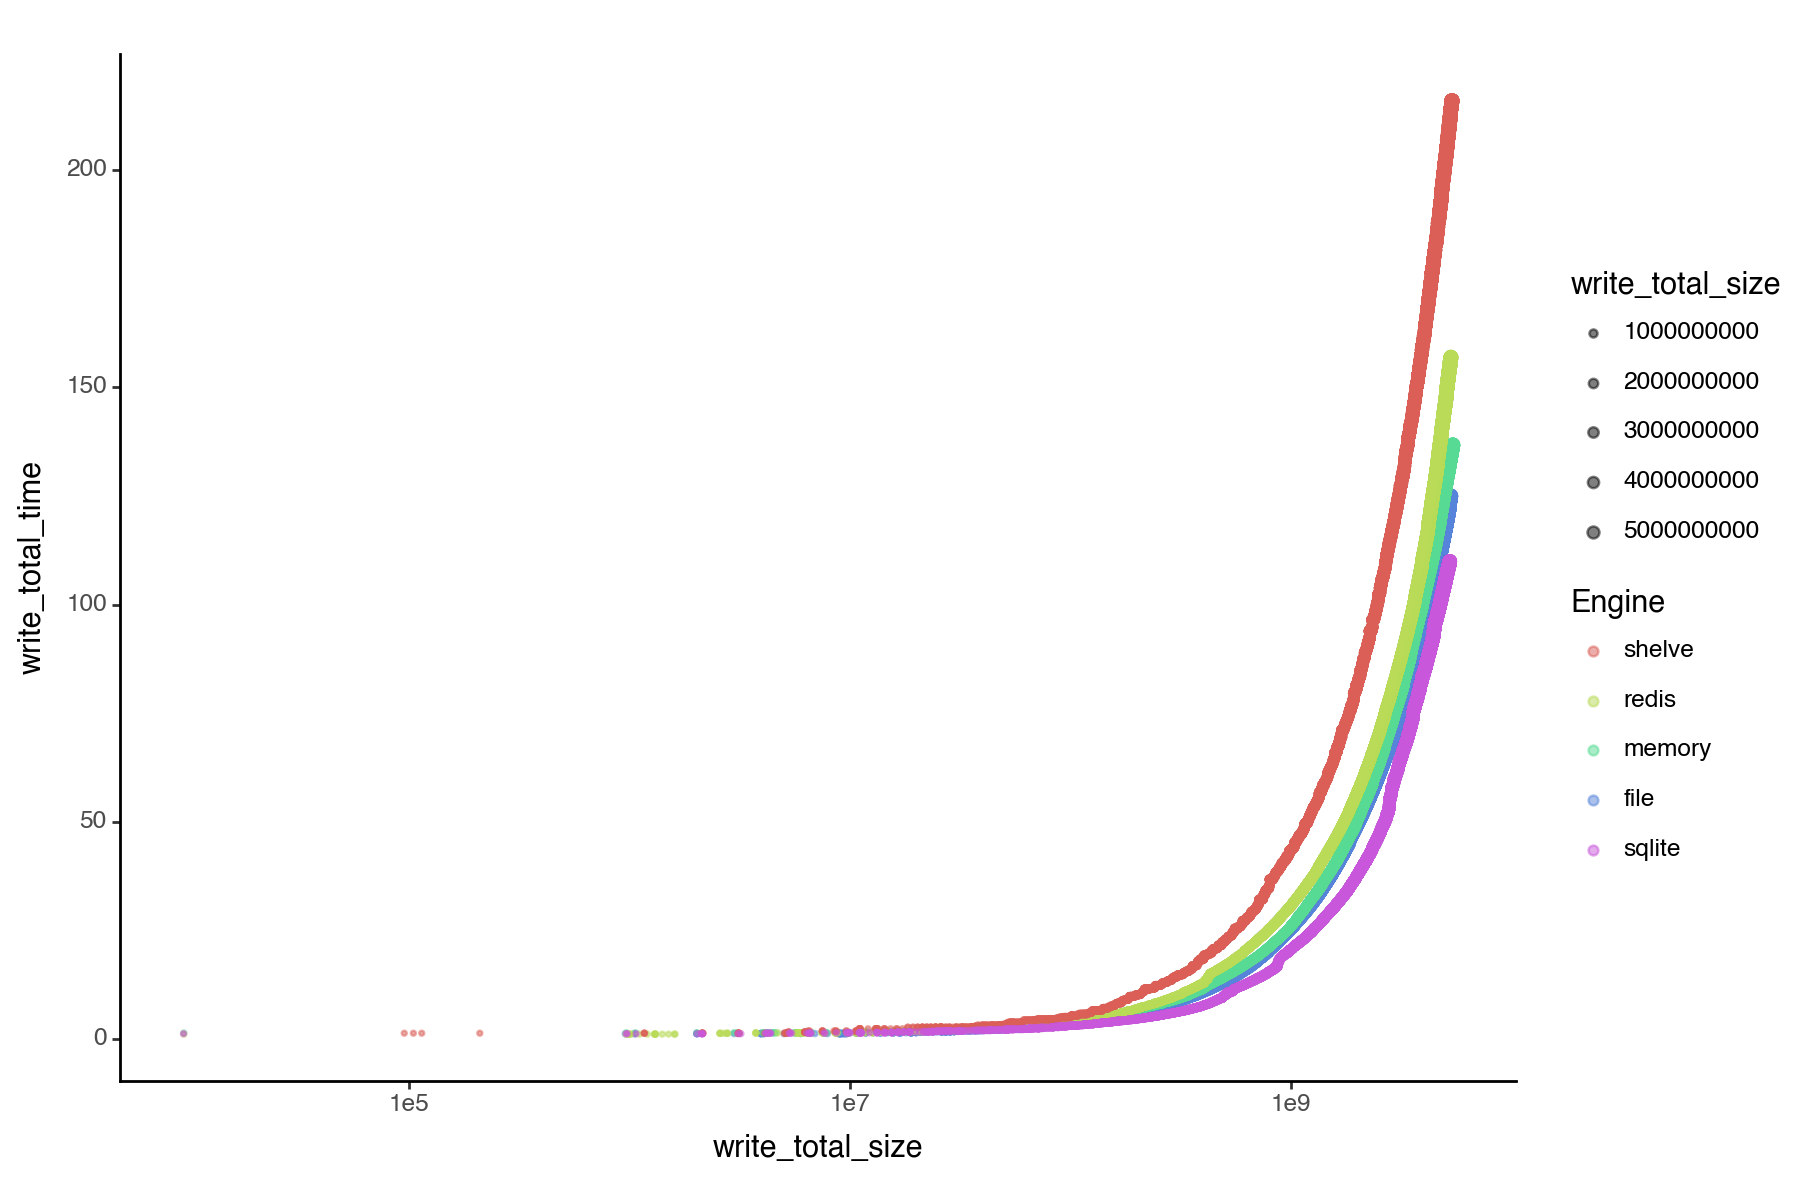

<Figure Size: (900 x 600)>

In [26]:
plot_sizes(profiler, x='write_total_size', **profile_kwargs)

In [7]:
# # !pip install -U pip wheel
# # !pip install scikit-misc
# # You can then use this method in your plotting function
# def plot_speed(self, y='Speed (MB/s)'):
#     import plotnine as p9
#     p9.options.figure_size = 9, 6
#     kwargs={**profile_kwargs, 'num_proc':10}
#     figdf = self.profile_df(group_by=['Engine', 'Encoding', 'Method', 'Num Processes', 'Speed Type'], by_speed=True, **kwargs).reset_index()
#     figdf = figdf.sort_values('Num Processes')
#     fig = p9.ggplot(figdf, p9.aes(x='Num Processes', y=y, size='Rate (it/s)',
#                                   color='Encoding'))
#     # fig += p9.geom_line(alpha=.5, size=2)
#     fig += p9.geom_point(alpha=.5)
#     fig += p9.geom_smooth()
#     engine_order = figdf.groupby('Engine')[y].mean().sort_values(ascending=False).index
#     figdf['Engine'] = pd.Categorical(figdf['Engine'], categories=engine_order)
#     # fig += p9.facet_wrap('Engine',nrow=1)
#     fig += p9.facet_grid('Speed Type~Engine', scales='free_y')
#     # fig += p9.scale_y_log10()
#     fig += p9.theme_classic()
#     return fig

# # profile_df_reshaped(profiler)
# # To use the new plot:
# plot_speed(profiler)

In [8]:
# # !pip install plotnine
# def plot_by_num_proc(self, y='Speed (MB/s)'):
#     import plotnine as p9
#     p9.options.figure_size=9,9
#     figdf = profile_reshaped(self)
#     figdf = figdf.groupby('Num Processes']).mean(numeric_only=True).reset_index()
#     return figdf
#     fig = p9.ggplot(figdf, p9.aes(x='Num Processes', y=y, color='Encoding', shape='Speed Type', label='Method'))
#     fig += p9.geom_line(alpha=.25, size=1)
#     fig += p9.geom_point(alpha=.25, size=5)

#     engine_order = figdf.groupby('Engine')[y].mean().sort_values(ascending=False).index
#     figdf['Engine'] = pd.Categorical(figdf['Engine'], categories=engine_order)
#     fig += p9.facet_wrap('Engine',nrow=1)
#     fig += p9.scale_x_log10()
#     fig += p9.scale_y_log10()
#     # fig += p9.geom_text(size=12)
#     fig += p9.theme_minimal()
#     return fig



# plot_by_num_proc(profiler)

In [9]:
# # !pip install plotnine
# import plotnine as p9
# p9.options.figure_size=9,9
# figdf = df.reset_index()
# fig = p9.ggplot(figdf, p9.aes(x='Read Speed (MB/s)', y='Write Speed (MB/s)', color='Engine', shape='Encoding', label='Method'))
# fig += p9.geom_point(alpha=.25, size=5)
# # fig += p9.scale_x_log10()
# # fig += p9.scale_y_log10()
# # fig += p9.geom_text(size=12)
# fig += p9.theme_minimal()
# fig

In [10]:
# # !pip install plotnine
# import plotnine as p9
# p9.options.figure_size=9,9
# figdf = df.reset_index()
# fig = p9.ggplot(figdf, p9.aes(x='Read Rate (it/s)', y='Write Rate (it/s)', color='Encoding', shape='Engine', label='Method'))
# fig += p9.geom_point(alpha=.25, size=5)
# fig += p9.scale_x_log10()
# fig += p9.scale_y_log10()
# # fig += p9.geom_text(size=12)
# fig += p9.theme_minimal()
# fig